# Coursera Capstone Project - Opening an Inn in The Philippines

## 1 Introduction

### 1.1 Background

The Philippines is made up of 7,641 islands inhabited by a population of 106.7 million, last reported as of 2018. Jane, a Torontonian who is about to complete her degree in hospitality & hotel management, would like to travel back to her home country and open up an. Apart from planning her expenses and sorting out the logistics to operate an inn, Jane must figure out the optimal location to start her business.

For this project, we will use several tools in Data Science & Machine Learning to find the best location that will suit Jane's business needs. Such tools & methods include implementing Exploratory Data Analysis, Folium (an interactive data visualization map tool), and the use of the K-Means Clustering algorithm to create a conclusion from location data. 

### 1.2 The Data 

The spreadsheet obtained from https://simplemaps.com/data/ph-cities consists of several cities in the Philippines. This dataset will provide necessary information on their coordinate systems. These coordinates will then be used on the Foursquare Places API to gather information on venues, tourist attractions, restaurants, and dense population areas that will compliment an inn. 

## 2 Coding & Analysis

### 2.1 Installing required dependencies & libraries

In [1]:
#install Beautiful Soup, requests & lmxl for Web Scaping
!pip install BeautifulSoup4
!pip install requests
!pip install lxml
!pip install geocoder
!pip install geopy
!pip install folium

In [2]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


### 2.2 Import data set from the simplemaps database and do some cleaning

In [3]:
ph = pd.read_csv('G:\My Drive\IBM DATA SCIENCE COURSERA\ph.csv')
ph.sort_values(by = 'population', ascending = False)
ph.drop(columns = ['country','capital'], inplace = True)
# lets drop rows where population is NaN
ph_na = ph[ph['population'].notna()]
ph_na

,city,lat,lng,iso2,admin,population,population_proper
0,Barilan,14.633300,121.000000,PH,Quezon,11100000.0,3077575.0
1,Quezon City,14.648800,121.050900,PH,Quezon,2761720.0,2761720.0
2,Davao,7.073056,125.612778,PH,Davao,1402000.0,1212504.0
3,Cagayan de Oro,8.481111,124.643056,PH,Cagayan de Oro,1121561.0,602088.0
4,General Santos,6.112778,125.171667,PH,General Santos,950530.0,538086.0
5,Bacolod,10.667700,122.953300,PH,Bacolod,949354.0,511820.0
6,Cebu City,10.311111,123.891667,PH,Cebu,815000.0,798634.0
7,Zamboanga City,6.910255,122.071715,PH,Zamboanga,773000.0,457623.0
8,Dinaga,13.650000,123.166667,PH,Camarines Sur,741635.0,174931.0
9,Iligan,8.230833,124.236111,PH,Iligan,464599.0,464599.0


In [4]:
# count the number of cities in our dataframe
print(f"The number of cities in our dataframe is: {ph_na['city'].nunique()}")
# count number of provinces
print(f"The number of provinces in our dataframe is: {ph_na['admin'].nunique()}")

The number of cities in our dataframe is: 37
The number of provinces in our dataframe is: 35


There are plenty of locations for Jane to open up her business in the Philippines.

Let's visualize the population of each city to get a better understanding

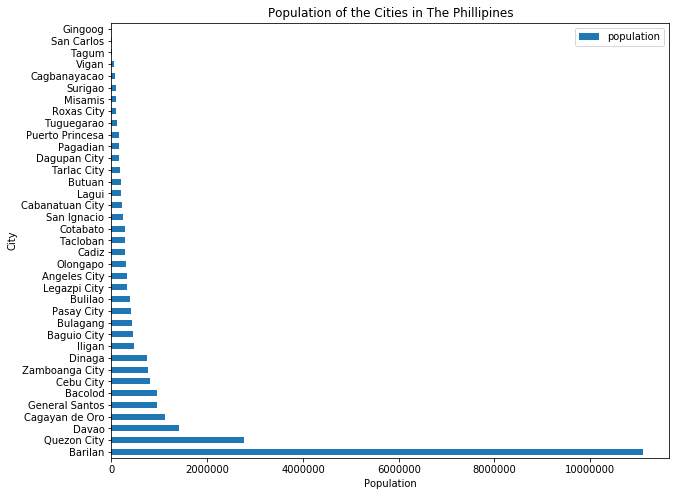

In [5]:
ph_na.plot(x = 'city', y = 'population',kind = 'barh', figsize = (10,8))
plt.xlabel('Population')
plt.ylabel('City')
plt.title('Population of the Cities in The Phillipines')
plt.ticklabel_format(style='plain', axis='x')

plt.show()

The city of Barilan is the most populated city in the Phillipines. 

### 2.3 Extracting geographical coordinates & using that data to create a map using Folium

In [6]:
address = 'Philippines'

geolocator = Nominatim(user_agent="Philippines")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of The Philippines are {}, {}.'.format(latitude, longitude))

The geographical coordinates of The Philippines are 12.7503486, 122.7312101.


In [7]:
# create map of The Philipines using latitude and longitude values
map_philippines = folium.Map(location=[latitude, longitude], zoom_start=6)

# add markers to map
for lat, lng, city in zip(ph_na['lat'], ph_na['lng'], ph_na['city']):
    label = ' {}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#86cc31',
        fill_opacity=0.7,
        parse_html=False).add_to(map_philippines)  
    
map_philippines

Let's initialize our Foursquare API credentials

In [8]:
CLIENT_ID = 'XXXXXXXXXXXXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXX' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XXXXXXXXXXXXXXXXXX
CLIENT_SECRET:XXXXXXXXXXXXXXXXXX


In [9]:
CLIENT_ID = 'FMAGEAH1QGRPWF520HQRBPUGVLM2X1XWXG0UA3A1U2FNR5RW' # your Foursquare ID
CLIENT_SECRET = '4JPRNHEJOZ45BX1NKG3QKXRT4YSIBPTPVWGIEBV02JUJ2ZD1' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FMAGEAH1QGRPWF520HQRBPUGVLM2X1XWXG0UA3A1U2FNR5RW
CLIENT_SECRET:4JPRNHEJOZ45BX1NKG3QKXRT4YSIBPTPVWGIEBV02JUJ2ZD1


Let's apply a function to the postal codes we have

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:
philipinnes_venues = getNearbyVenues(names = ph_na['city'],
                                   latitudes = ph_na['lat'],
                                   longitudes = ph_na['lng']
                                  )

Barilan
Quezon City
Davao
Cagayan de Oro
General Santos
Bacolod
Cebu City
Zamboanga City
Dinaga
Iligan
Baguio City
Bulagang
Pasay City
Bulilao
Legazpi City
Angeles City
Olongapo
Cadiz
Tacloban
Cotabato
San Ignacio
Cabanatuan City
Lagui
Butuan
Tarlac City
Dagupan City
Pagadian
Puerto Princesa
Tuguegarao
Roxas City
Misamis
Surigao
Cagbanayacao
Vigan
Tagum
San Carlos
Gingoog


In [12]:
philipinnes_venues.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barilan,14.6333,121.0,Army Navy Burger + Burrito,14.632606,121.001846,Burrito Place
1,Barilan,14.6333,121.0,Tasty Dumplings,14.632874,121.002133,Chinese Restaurant
2,Barilan,14.6333,121.0,Kimpo Tea House,14.634365,121.001526,Chinese Restaurant
3,Barilan,14.6333,121.0,Trà Vinh,14.631662,120.999463,Vietnamese Restaurant
4,Barilan,14.6333,121.0,Café Monaco,14.633123,121.001650,Korean Restaurant


In [13]:
philipinnes_venues.tail()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
644,Gingoog,8.827778,125.099722,Pahayahay,8.829872,125.099909,Harbor / Marina
645,Gingoog,8.827778,125.099722,Mansion by the Sea,8.829962,125.099345,Filipino Restaurant
646,Gingoog,8.827778,125.099722,"pantalan, gingoog city",8.829981,125.099275,Beach
647,Gingoog,8.827778,125.099722,Pantalan sa Gingoog,8.829916,125.098920,Speakeasy
648,Gingoog,8.827778,125.099722,Europe Cuisine Restaurant & Coffee Shop,8.825705,125.101139,Restaurant


In [14]:
philipinnes_venues.shape

(649, 7)

In [15]:
print('The number of unique categories are {}.'.format(len(philipinnes_venues['Venue Category'].unique())))

The number of unique categories are 119.


### 2.4 One Hot Encoding

In [16]:
ph_onehot = pd.get_dummies(philipinnes_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ph_onehot['City'] = philipinnes_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [ph_onehot.columns[-1]] + list(ph_onehot.columns[:-1])
ph_onehot = ph_onehot[fixed_columns]
ph_onehot.head()

,City,African Restaurant,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,...,Tea Room,Theme Park Ride / Attraction,Track Stadium,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Winery,Yoga Studio
0,Barilan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barilan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barilan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barilan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Barilan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
ph_onehot.shape

(649, 120)

In [18]:
#get list of different columns
for col in ph_onehot.columns[1:]:
    print(col)

African Restaurant
American Restaurant
Art Gallery
Arts & Crafts Store
Asian Restaurant
Athletics & Sports
BBQ Joint
Badminton Court
Bakery
Bar
Basketball Stadium
Beach
Bed & Breakfast
Beer Garden
Bistro
Bookstore
Breakfast Spot
Bubble Tea Shop
Buffet
Burger Joint
Burrito Place
Bus Station
Café
Campground
Candy Store
Casino
Chinese Restaurant
Clothing Store
Cocktail Bar
Coffee Shop
Comfort Food Restaurant
Convenience Store
Cosmetics Shop
Cupcake Shop
Deli / Bodega
Department Store
Dessert Shop
Diner
Donut Shop
Dumpling Restaurant
Electronics Store
Empanada Restaurant
Farm
Fast Food Restaurant
Filipino Restaurant
Flea Market
Food
Food & Drink Shop
Food Court
Fountain
French Restaurant
Fried Chicken Joint
Frozen Yogurt Shop
Gas Station
Gastropub
Grocery Store
Gym
Gym / Fitness Center
Harbor / Marina
High School
Historic Site
Hostel
Hot Dog Joint
Hotel
Hotel Pool
Ice Cream Shop
Intersection
Italian Restaurant
Japanese Restaurant
Karaoke Bar
Korean Restaurant
Lounge
Market
Massage Studio
M

In [19]:
# show the mean of what each city has
ph_grouped = ph_onehot.groupby('City').mean().reset_index()
ph_grouped.head()

,City,African Restaurant,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,...,Tea Room,Theme Park Ride / Attraction,Track Stadium,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Winery,Yoga Studio
0,Angeles City,0.0,0.0,0.0,0.0,0.142857,0.0,0.285714,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,Bacolod,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,Baguio City,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,Barilan,0.0,0.0,0.0,0.0,0.033333,0.0,0.000000,0.0,0.033333,...,0.033333,0.0,0.0,0.0,0.0,0.033333,0.033333,0.0,0.0,0.0
4,Bulagang,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [20]:
ph_grouped.shape

(33, 120)

In [21]:
# determine the frequency in each city
# source: IBM Applied Data Science Capstone Lab Week 3
# Segmenting and Clustering Neighborhoods in New York City

num_top_venues = 5

for hood in ph_grouped['City']:
    print("----"+hood+"----")
    temp = ph_grouped[ph_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Angeles City----
                  venue  freq
0             BBQ Joint  0.29
1              Pharmacy  0.14
2  Fast Food Restaurant  0.14
3         Grocery Store  0.14
4    Chinese Restaurant  0.14


----Bacolod----
                       venue  freq
0                      Hotel  0.11
1                        Gym  0.11
2          Food & Drink Shop  0.11
3  Middle Eastern Restaurant  0.11
4              Grocery Store  0.11


----Baguio City----
                  venue  freq
0  Fast Food Restaurant  0.29
1     Convenience Store  0.14
2                 Hotel  0.14
3            Campground  0.07
4            Steakhouse  0.07


----Barilan----
                venue  freq
0  Chinese Restaurant  0.20
1     Bubble Tea Shop  0.10
2         Coffee Shop  0.07
3                 Spa  0.07
4       Burrito Place  0.03


----Bulagang----
                venue  freq
0  Chinese Restaurant  0.50
1          Restaurant  0.25
2               Beach  0.25
3  African Restaurant  0.00
4         Men's Store  0

In [22]:
# put this into a dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [23]:
# create the new dataframe of top 10 venues and apply k-means afterwards
# source: IBM Applied Data Science Capstone Lab Week 3
# Segmenting and Clustering Neighborhoods in New York City
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cities_sorted = pd.DataFrame(columns=columns)
cities_sorted['City'] = ph_grouped['City']

for ind in np.arange(ph_grouped.shape[0]):
    cities_sorted.iloc[ind, 1:] = return_most_common_venues(ph_grouped.iloc[ind, :], num_top_venues)

cities_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Angeles City,BBQ Joint,Pharmacy,Grocery Store,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant,Diner,Empanada Restaurant,Electronics Store,Dumpling Restaurant
1,Bacolod,Gym,Food & Drink Shop,Chinese Restaurant,Deli / Bodega,Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Grocery Store,Hotel,Fried Chicken Joint
2,Baguio City,Fast Food Restaurant,Convenience Store,Hotel,Flea Market,Campground,Restaurant,Café,Steakhouse,Coffee Shop,Fountain
3,Barilan,Chinese Restaurant,Bubble Tea Shop,Coffee Shop,Spa,Grocery Store,Food & Drink Shop,Dumpling Restaurant,Japanese Restaurant,Café,Pizza Place
4,Bulagang,Chinese Restaurant,Restaurant,Beach,Yoga Studio,Fast Food Restaurant,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop


## 3. K-means Clustering

### 3.1 Clustering Cities

In [24]:
# Run k-means to cluster the neighborhood into 5 clusters

# set number of clusters
kclusters = 5

ph_grouped_clustering = ph_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ph_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 1, 2, 0, 2, 1, 1, 2, 0])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each city.

In [25]:
# add clustering labels
cities_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [63]:
ph_merged = ph_na

# merge ph_merged with cities_sorted to include geographical columns
ph_merged = ph_merged.join(cities_sorted.set_index('City'), on='city')

ph_merged.head() # check the last columns!

,city,lat,lng,iso2,admin,population,population_proper,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barilan,14.633300,121.000000,PH,Quezon,11100000.0,3077575.0,2.0,Chinese Restaurant,Bubble Tea Shop,Coffee Shop,Spa,Grocery Store,Food & Drink Shop,Dumpling Restaurant,Japanese Restaurant,Café,Pizza Place
1,Quezon City,14.648800,121.050900,PH,Quezon,2761720.0,2761720.0,2.0,Filipino Restaurant,BBQ Joint,Coffee Shop,Japanese Restaurant,Karaoke Bar,Gym,Diner,Donut Shop,Fast Food Restaurant,Spa
2,Davao,7.073056,125.612778,PH,Davao,1402000.0,1212504.0,2.0,Café,Chinese Restaurant,Coffee Shop,Bar,Hotel,Spa,Convenience Store,Dessert Shop,Diner,Park
3,Cagayan de Oro,8.481111,124.643056,PH,Cagayan de Oro,1121561.0,602088.0,2.0,Restaurant,Spa,Filipino Restaurant,Fast Food Restaurant,Asian Restaurant,Turkish Restaurant,BBQ Joint,Café,Bakery,Coffee Shop
4,General Santos,6.112778,125.171667,PH,General Santos,950530.0,538086.0,1.0,Convenience Store,Hotel,Plaza,Coffee Shop,Cupcake Shop,Asian Restaurant,Fast Food Restaurant,Restaurant,Diner,Breakfast Spot


### 3.2 Visualize the clusters

In [27]:
# remove NaN cluster labels & converting to int to initialize plotting
ph_merged = ph_merged.dropna(axis='rows')
ph_merged['Cluster Labels'] = ph_merged['Cluster Labels'].astype(int)
ph_merged.head()

,city,lat,lng,iso2,admin,population,population_proper,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barilan,14.633300,121.000000,PH,Quezon,11100000.0,3077575.0,2,Chinese Restaurant,Bubble Tea Shop,Coffee Shop,Spa,Grocery Store,Food & Drink Shop,Dumpling Restaurant,Japanese Restaurant,Café,Pizza Place
1,Quezon City,14.648800,121.050900,PH,Quezon,2761720.0,2761720.0,2,Filipino Restaurant,BBQ Joint,Coffee Shop,Japanese Restaurant,Karaoke Bar,Gym,Diner,Donut Shop,Fast Food Restaurant,Spa
2,Davao,7.073056,125.612778,PH,Davao,1402000.0,1212504.0,2,Café,Chinese Restaurant,Coffee Shop,Bar,Hotel,Spa,Convenience Store,Dessert Shop,Diner,Park
3,Cagayan de Oro,8.481111,124.643056,PH,Cagayan de Oro,1121561.0,602088.0,2,Restaurant,Spa,Filipino Restaurant,Fast Food Restaurant,Asian Restaurant,Turkish Restaurant,BBQ Joint,Café,Bakery,Coffee Shop
4,General Santos,6.112778,125.171667,PH,General Santos,950530.0,538086.0,1,Convenience Store,Hotel,Plaza,Coffee Shop,Cupcake Shop,Asian Restaurant,Fast Food Restaurant,Restaurant,Diner,Breakfast Spot


In [29]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ph_merged['lat'], ph_merged['lng'], ph_merged['city'], ph_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 3.3 Examining Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

In [56]:
# drop the following column, as it is not necessary
ph_merged.drop(['population_proper'], axis = 1, inplace = True)

In [57]:
# Cluster 0 -> Red
ph_merged.loc[ph_merged['Cluster Labels'] == 0, ph_merged.columns[[0] + list(range(4, ph_merged.shape[1]))]]

,city,admin,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Bulagang,Batangas,424508.0,0,Chinese Restaurant,Restaurant,Beach,Yoga Studio,Fast Food Restaurant,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop
32,Cagbanayacao,Samar,67921.0,0,Chinese Restaurant,Restaurant,Spa,Yoga Studio,Empanada Restaurant,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store


In [58]:
# Cluster 1 -> Purple
ph_merged.loc[ph_merged['Cluster Labels'] == 1, ph_merged.columns[[0] + list(range(4, ph_merged.shape[1]))]]

,city,admin,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,General Santos,General Santos,950530.0,1,Convenience Store,Hotel,Plaza,Coffee Shop,Cupcake Shop,Asian Restaurant,Fast Food Restaurant,Restaurant,Diner,Breakfast Spot
5,Bacolod,Bacolod,949354.0,1,Gym,Food & Drink Shop,Chinese Restaurant,Deli / Bodega,Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Grocery Store,Hotel,Fried Chicken Joint
6,Cebu City,Cebu,815000.0,1,Coffee Shop,Spa,Hotel,Pizza Place,Seafood Restaurant,BBQ Joint,New American Restaurant,Mexican Restaurant,Massage Studio,Korean Restaurant
7,Zamboanga City,Zamboanga,773000.0,1,Hotel,Fast Food Restaurant,Convenience Store,Mobile Phone Shop,Department Store,Café,Burrito Place,Seafood Restaurant,Burger Joint,Bubble Tea Shop
10,Baguio City,Baguio,447824.0,1,Fast Food Restaurant,Convenience Store,Hotel,Flea Market,Campground,Restaurant,Café,Steakhouse,Coffee Shop,Fountain
14,Legazpi City,Albay,320081.0,1,Hotel,Filipino Restaurant,Diner,Restaurant,Bakery,Fast Food Restaurant,Park,Stadium,Cocktail Bar,Convenience Store
16,Olongapo,Olongapo,304388.0,1,Convenience Store,Diner,Coffee Shop,Grocery Store,Fast Food Restaurant,Bakery,Restaurant,Supermarket,Department Store,Nail Salon
21,Cabanatuan City,Nueva Ecija,220250.0,1,Fast Food Restaurant,Asian Restaurant,Bubble Tea Shop,Breakfast Spot,Food,Hotel,Flea Market,Filipino Restaurant,Bookstore,Medical Center
23,Butuan,Butuan,190557.0,1,Hotel,Pharmacy,Pizza Place,Fast Food Restaurant,Chinese Restaurant,Convenience Store,Donut Shop,Market,Karaoke Bar,Spa
24,Tarlac City,Tarlac,183930.0,1,Fast Food Restaurant,Pizza Place,Filipino Restaurant,Café,Spa,Bookstore,Lounge,Shopping Mall,Racetrack,Bubble Tea Shop


In [59]:
# Cluster 2 -> Blue
ph_merged.loc[ph_merged['Cluster Labels'] == 2, ph_merged.columns[[0] + list(range(4, ph_merged.shape[1]))]]

,city,admin,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barilan,Quezon,11100000.0,2,Chinese Restaurant,Bubble Tea Shop,Coffee Shop,Spa,Grocery Store,Food & Drink Shop,Dumpling Restaurant,Japanese Restaurant,Café,Pizza Place
1,Quezon City,Quezon,2761720.0,2,Filipino Restaurant,BBQ Joint,Coffee Shop,Japanese Restaurant,Karaoke Bar,Gym,Diner,Donut Shop,Fast Food Restaurant,Spa
2,Davao,Davao,1402000.0,2,Café,Chinese Restaurant,Coffee Shop,Bar,Hotel,Spa,Convenience Store,Dessert Shop,Diner,Park
3,Cagayan de Oro,Cagayan de Oro,1121561.0,2,Restaurant,Spa,Filipino Restaurant,Fast Food Restaurant,Asian Restaurant,Turkish Restaurant,BBQ Joint,Café,Bakery,Coffee Shop
9,Iligan,Iligan,464599.0,2,Café,Convenience Store,Pharmacy,Food & Drink Shop,Clothing Store,Chinese Restaurant,Plaza,Diner,Donut Shop,Bubble Tea Shop
13,Bulilao,Iloilo,387681.0,2,BBQ Joint,Filipino Restaurant,Coffee Shop,Café,Tea Room,Soup Place,Chinese Restaurant,Gastropub,Hotel,Donut Shop
18,Tacloban,Tacloban,280006.0,2,Asian Restaurant,Café,Hotel,Cupcake Shop,Bubble Tea Shop,Italian Restaurant,Diner,Coffee Shop,Mexican Restaurant,Donut Shop
25,Dagupan City,Dagupan,163676.0,2,Chinese Restaurant,Café,Fast Food Restaurant,Spa,Bus Station,Coffee Shop,Convenience Store,Plaza,Pizza Place,High School
29,Roxas City,Capiz,102688.0,2,Café,Chinese Restaurant,Dessert Shop,Coffee Shop,Department Store,Restaurant,Spa,Fast Food Restaurant,Beer Garden,Pub
36,Gingoog,Misamis Oriental,218.0,2,Harbor / Marina,BBQ Joint,Restaurant,Filipino Restaurant,Beach,Speakeasy,Frozen Yogurt Shop,Gas Station,Cosmetics Shop,Cupcake Shop


In [60]:
# Cluster 3 -> Cyan
ph_merged.loc[ph_merged['Cluster Labels'] == 3, ph_merged.columns[[0] + list(range(4, ph_merged.shape[1]))]]

,city,admin,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Pasay City,Pasay,403064.0,3,Fast Food Restaurant,Shopping Mall,Chinese Restaurant,Basketball Stadium,Deli / Bodega,Plaza,Breakfast Spot,Stadium,Intersection,Convenience Store
15,Angeles City,Angeles,314493.0,3,BBQ Joint,Pharmacy,Grocery Store,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant,Diner,Empanada Restaurant,Electronics Store,Dumpling Restaurant
19,Cotabato,Cotabato,279519.0,3,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Shopping Mall,BBQ Joint,French Restaurant,Arts & Crafts Store,Park,Cosmetics Shop,Cupcake Shop
31,Surigao,Surigao del Norte,87832.0,3,Fast Food Restaurant,Spa,Athletics & Sports,Seafood Restaurant,Coffee Shop,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store


In [62]:
# Cluster 4 -> Orange
ph_merged.loc[ph_merged['Cluster Labels'] == 4, ph_merged.columns[[0] + list(range(4, ph_merged.shape[1]))]]

,city,admin,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,San Ignacio,Laguna,240830.0,4,Farm,Filipino Restaurant,Convenience Store,Fast Food Restaurant,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner
